In [0]:
import numpy as np
import pandas as pd
import nltk

In [2]:
## download the data in json format
! wget http://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json

--2020-02-23 15:58:57--  http://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.28.128, 2607:f8b0:400e:c07::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.28.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘sarcasm.json.6’

sarcasm.json.6      100%[===================>]   5.38M  --.-KB/s    in 0.02s   

2020-02-23 15:58:57 (273 MB/s) - ‘sarcasm.json.6’ saved [5643545/5643545]



In [0]:
import json
with open('sarcasm.json','r') as f:
    data = json.load(f)

In [0]:
headline=[]
target = []
for item in data:
  headline.append(item['headline'])
  target.append(item['is_sarcastic'])

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [0]:
tv = TfidfVectorizer(max_features = 5000)

In [0]:
feature = tv.fit_transform(headline).toarray()

In [8]:
feature

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [0]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(feature,target)

In [0]:
from sklearn.svm import LinearSVC

In [0]:
lsvc = LinearSVC()

In [12]:
lsvc.fit(x_train,y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [13]:
lsvc.score(x_test,y_test)

0.839173405211141

In [14]:
lsvc.predict(x_test)

array([0, 0, 0, ..., 1, 0, 1])

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC,LinearSVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
lsvc=LinearSVC()
dtc=DecisionTreeClassifier()
knnc=KNeighborsClassifier()
svc=SVC()
gbc=GradientBoostingClassifier()
rfc=RandomForestClassifier()
from mlxtend.classifier import StackingCVClassifier

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [0]:
from sklearn.ensemble import VotingClassifier
estimators=[rfc,dtc,svc,gbc]


In [0]:
# accuracy = []
# i=1
# for model in estimators:
#   model.fit(x_train,y_train)
#   print ("working on model   "+str(i))
#   accuracy.append(model.score(x_test,y_test))
#   i+=1

In [18]:
lsvc = LinearSVC()
lsvc.fit(x_train,y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [20]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/bbc-text.csv

--2020-02-23 16:01:56--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/bbc-text.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.202.128, 2607:f8b0:400e:c09::80
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.202.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5057493 (4.8M) [application/octet-stream]
Saving to: ‘bbc-text.csv’

bbc-text.csv        100%[===================>]   4.82M  --.-KB/s    in 0.1s    

2020-02-23 16:01:57 (39.8 MB/s) - ‘bbc-text.csv’ saved [5057493/5057493]



In [0]:
import csv

In [0]:
stopwords = [ "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]

In [0]:
labels = []
with open("bbc-text.csv", 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    next(reader)
    for row in reader:
        labels.append(row[0])
        sentence = row[1]
        for word in stopwords:
            token = " " + word + " "
            sentence = sentence.replace(token, " ")
        sentences.append(sentence)

In [25]:
set(labels)

{'business', 'entertainment', 'politics', 'sport', 'tech'}

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [0]:
tv = TfidfVectorizer(max_features = 5000)

In [0]:
feature = tv.fit_transform(sentences).toarray()

In [33]:
feature

array([[0.02202413, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.02663256, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.03063063, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.02059863, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [0]:
labels = tv.fit_transform(labels).toarray()

In [38]:
labels

array([[0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [0]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(feature,labels)

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
rfc = RandomForestClassifier()

In [42]:
rfc.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [43]:
rfc.score(x_test,y_test)

0.8635547576301615

In [44]:
rfc.predict(x_test)

array([[0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [45]:
y_test

array([[1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.]])

In [0]:
from sklearn.metrics import multilabel_confusion_matrix

In [0]:
import seaborn as sns

In [0]:
ans=[]
for item in y_test:
  ans.append(np.argmax(item))


In [0]:
predicted=[]
for item in rfc.predict(x_test):
  predicted.append(np.argmax(item))


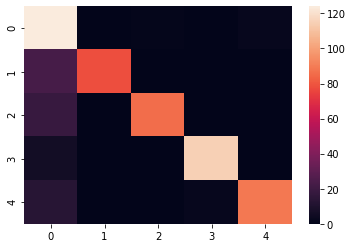

In [62]:
sns.heatmap(confusion_matrix(np.array(ans),np.array(predicted)))